In [1]:
import pandas as pd

def get_tickers(path):
    companies = pd.read_csv(path)
    ticker_list = list(companies['Ticker'])
    print('Retrieved', str(len(ticker_list)), 'ticker symbols.')
    return ticker_list


In [7]:
import quandl
 
def get_prices(ticker):
    print('Retrieving data for', ticker)
    prices = quandl.get('WIKI/' + ticker)['Adj. Close'].reset_index()
    prices['Ticker'] = ticker
    return prices
 
data = []
 
ticker_list = get_tickers('companies.csv')
 
for ticker in ticker_list:
    prices = get_prices(ticker)
    data.append(prices)

Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [19]:
data[0]

,Date,Adj. Close,Ticker
0,1980-12-12,0.422706,AAPL
1,1980-12-15,0.400652,AAPL
2,1980-12-16,0.371246,AAPL
3,1980-12-17,0.380362,AAPL
4,1980-12-18,0.391536,AAPL
...,...,...,...
9395,2018-03-21,171.270000,AAPL
9396,2018-03-22,168.845000,AAPL
9397,2018-03-23,164.940000,AAPL
9398,2018-03-26,172.770000,AAPL


In [8]:
def concat_pivot(data, rows, columns, values):
    df = pd.concat(data, sort=True)
    pivot = df.pivot_table(values=values, columns=columns, index=rows)
    return pivot


In [9]:
def compute_returns(df):
    returns = df.pct_change()
    return returns


In [10]:
def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.tail(days).mean())
    std = pd.DataFrame(df.tail(days).std())
    ratios = pd.concat([means, std], axis=1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean']/ratios['Std']
    return ratios


In [23]:
data_1 = concat_pivot(data, 'Date', 'Ticker', 'Adj. Close')
returns = compute_returns(data_1)
ratios = return_risk_ratio(data_1)
top10 = ratios.sort_values('Ratio', ascending=False).head(10)
top10.head()


,Company,Mean,Std,Ratio
11,NKE,66.476977,1.276235,52.088335
4,CCL,67.317000,1.488038,45.238773
9,MSFT,92.964000,2.060757,45.111567
6,DIS,103.692000,2.335759,44.393286
1,AAPL,174.461333,4.491211,38.845058


In [25]:
def corr_matrix(df, days=30):
    corr_matrix = df.tail(days).corr()
    return corr_matrix

target_list = returns[list(top10['Company'])]
correlation = corr_matrix(target_list)


In [26]:
corr_matrix(data_1)

Ticker,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,FB,GOOG,MSFT,NFLX,NKE,TSLA,UA
Ticker,,,,,,,,,,,,,,
AAP,1.000000,0.666429,0.766478,0.259932,-0.508595,-0.382691,-0.123227,0.249707,0.423156,0.566803,0.795862,-0.350351,0.014358,-0.296299
AAPL,0.666429,1.000000,0.651696,0.734583,-0.095840,-0.065714,0.381506,0.680766,0.831900,0.925058,0.575326,0.144692,0.550431,0.041468
AMZN,0.766478,0.651696,1.000000,0.283195,-0.407587,-0.701937,-0.231578,0.165907,0.519407,0.579439,0.917705,-0.331207,-0.088813,-0.531382
BAC,0.259932,0.734583,0.283195,1.000000,0.448148,0.288950,0.702782,0.894959,0.870248,0.811117,0.147371,0.375624,0.739460,0.443251
CCL,-0.508595,-0.095840,-0.407587,0.448148,1.000000,0.376230,0.664541,0.351661,0.300950,0.080806,-0.606188,0.749007,0.408884,0.503776
CI,-0.382691,-0.065714,-0.701937,0.288950,0.376230,1.000000,0.632558,0.379740,-0.006056,0.016639,-0.646839,0.431366,0.610860,0.766313
DIS,-0.123227,0.381506,-0.231578,0.702782,0.664541,0.632558,1.000000,0.753555,0.621510,0.504104,-0.335859,0.698039,0.844828,0.683900
FB,0.249707,0.680766,0.165907,0.894959,0.351661,0.379740,0.753555,1.000000,0.865249,0.714159,0.064775,0.302003,0.816614,0.451475
GOOG,0.423156,0.831900,0.519407,0.870248,0.300950,-0.006056,0.621510,0.865249,1.000000,0.854058,0.348616,0.301922,0.677963,0.140176


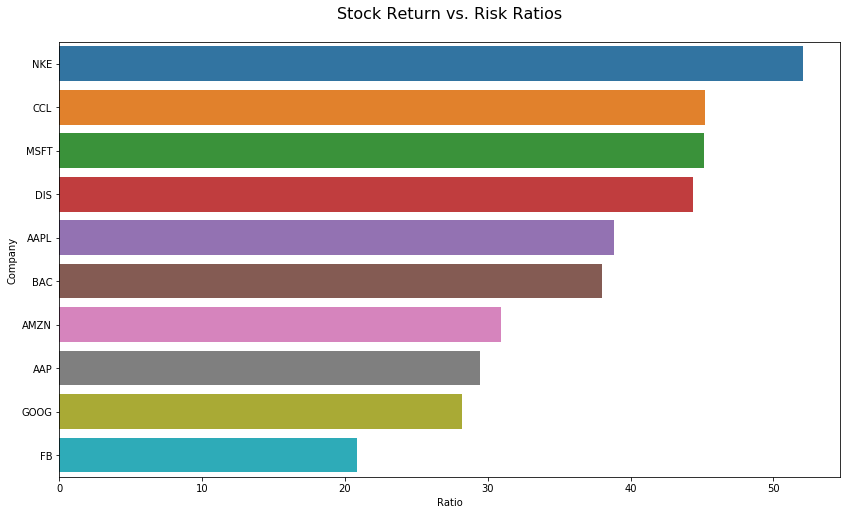

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def barchart(df, x, y, length=8, width=14, title=""):
    df = df.sort_values(x, ascending=False)
    plt.figure(figsize=(width,length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart

bar_plot = barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios')


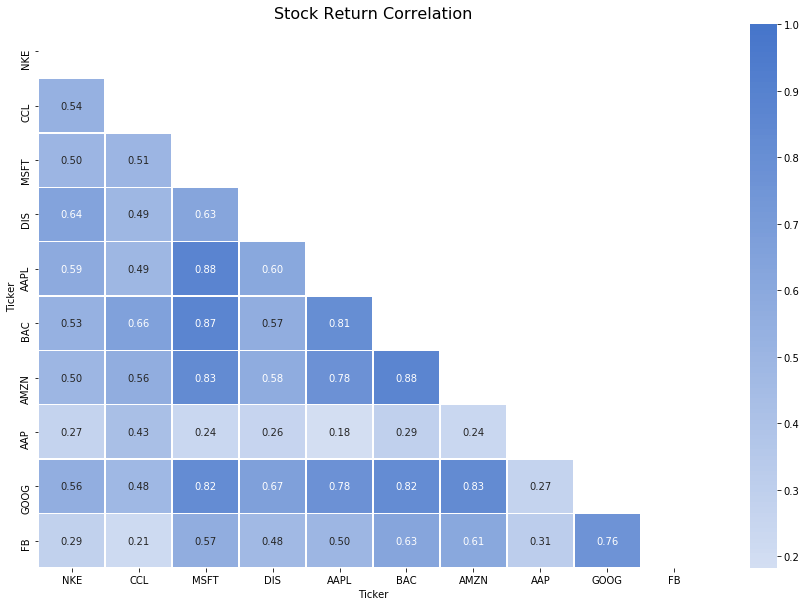

In [28]:
import numpy as np

def correlation_plot(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    return chart

corr_plot = correlation_plot(correlation, title='Stock Return Correlation')


In [29]:
def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title + '.png')
